# Modelo Auto-Cura

## Juan Andrés Galicia Reyes - Data Scientist


El área de conciliación con el cliente es un área encargada de velar por los indicadores de cartera vencida se encuentre dentro de márgenes sanos. Realizando gestiones como SMS, llamadas, etc.

Realizar un modelo Analítico para predecir si un cliente que entra en reciente mora, pagará dentro de los proximos 15 días

### Importamos las librerias y datos necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\juana\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\juana\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\juana\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("Base_entrenamiento.csv", nrows=19000)
test = pd.read_csv("BASE_PRUEBA.csv")
df

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,7,7,2.857738,3.5,7,7,1.166667,7,0,2.333333,...,0,0,0,0,0.000000,0,2,PYME,Pyme Pequena,201608
1,17,17,7.641989,12.0,17,17,8.000000,17,0,13.666667,...,0,2,0,0,8.810053,0,5,PYME,Pyme Pequena,201611
2,27,36,12.868566,13.5,27,27,21.000000,27,0,14.000000,...,0,7,0,0,10.500000,0,9,PYME,Pyme Pequena,201705
3,27,27,10.888832,13.5,27,27,4.833333,27,0,9.000000,...,0,0,0,0,0.000000,0,12,PYME,Pyme Pequena,201609
4,32,32,11.651895,10.0,20,20,20.833333,20,0,17.333333,...,0,19,0,0,9.190000,0,15,PYME,Pyme Pequena,201702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,23,0,0,12.593750,1,38387,PYME,Pyme Pequena,201612
18996,0,4,1.632993,0.0,0,0,0.666667,0,0,0.000000,...,0,2,0,0,7.506349,1,38388,PYME,Pyme Pequena,201706
18997,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,2,0,0,7.506349,1,38390,PYME,Pyme Pequena,201706
18998,5,5,2.041241,2.5,5,5,0.833333,5,0,1.666667,...,0,1,0,0,10.041311,1,38391,PYME,Pyme Pequena,201707


In [3]:
test

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,5,5,2.041241,2.5,5,5,0.833333,5,0,1.666667,...,0,0,1,0,0,10.041311,38395,PYME,Pyme Pequena,201707
1,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,2,0,0,7.506349,38396,PYME,Pyme Pequena,201706
2,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,2,0,0,7.506349,38398,PYME,Pyme Pequena,201706
3,5,5,2.886751,2.5,5,5,1.666667,5,0,1.666667,...,0,0,1,0,0,10.041311,38401,PYME,Pyme Pequena,201707
4,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,1,0,0,10.041311,38402,PYME,Pyme Pequena,201707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15,15,5.879342,0.0,0,0,4.166667,0,0,5.000000,...,0,0,1,0,0,8.965414,40440,PYME,Pyme Pequena,201704
996,9,15,6.220932,4.5,0,0,4.500000,9,0,4.000000,...,0,0,3,0,0,13.772206,40442,PYME,Pyme Pequena,201707
997,3,15,5.899152,1.5,3,3,4.000000,3,0,1.000000,...,0,0,1,0,0,5.995293,40447,PYME,Pyme Pequena,201705
998,4,4,1.788854,2.0,4,4,0.800000,4,0,1.333333,...,0,0,6,0,0,12.083929,40451,PYME,Pyme Pequena,201611


In [4]:
test.isna().sum().sum()

0

Verificamos la existencia de nulos

In [5]:
df.isna().sum()/len(df)*100

max_trim                  0.0
max_sem                   0.0
desv_sem                  0.0
prom_bim                  0.0
max_mes_anterior          0.0
                         ... 
y_auto_cura               0.0
llave                     0.0
segmentoestructural       0.0
subsegmentoestructural    0.0
anhomes_ciclo             0.0
Length: 124, dtype: float64

In [6]:
np.max(df.isna().sum()/len(df)*100)

0.0

Buscamos que columnas son de tipo categorico

In [7]:
df.select_dtypes(include=['object']).columns

Index(['segmentoestructural', 'subsegmentoestructural'], dtype='object')

In [8]:
df[["segmentoestructural","subsegmentoestructural"]]

,segmentoestructural,subsegmentoestructural
0,PYME,Pyme Pequena
1,PYME,Pyme Pequena
2,PYME,Pyme Pequena
3,PYME,Pyme Pequena
4,PYME,Pyme Pequena
...,...,...
18995,PYME,Pyme Pequena
18996,PYME,Pyme Pequena
18997,PYME,Pyme Pequena
18998,PYME,Pyme Pequena


In [9]:
df["segmentoestructural"].unique()

array(['PYME'], dtype=object)

In [10]:
df["subsegmentoestructural"].unique()

array(['Pyme Pequena'], dtype=object)

Verificamos que las dos columnas de tipo categorico, unicamente incluyen una categoria, por lo que no nos aportan ninguna informacion.

Decidimos botarlas

In [11]:
df2 = df.drop(["segmentoestructural","subsegmentoestructural"], axis=1)
df2.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [12]:
df2.dtypes.value_counts()

int64      94
float64    28
Name: count, dtype: int64

Verificamos si existen llaves repetidas

In [13]:
df2["llave"].duplicated().any()

False

### Exploración

Exploramos la correlacion 

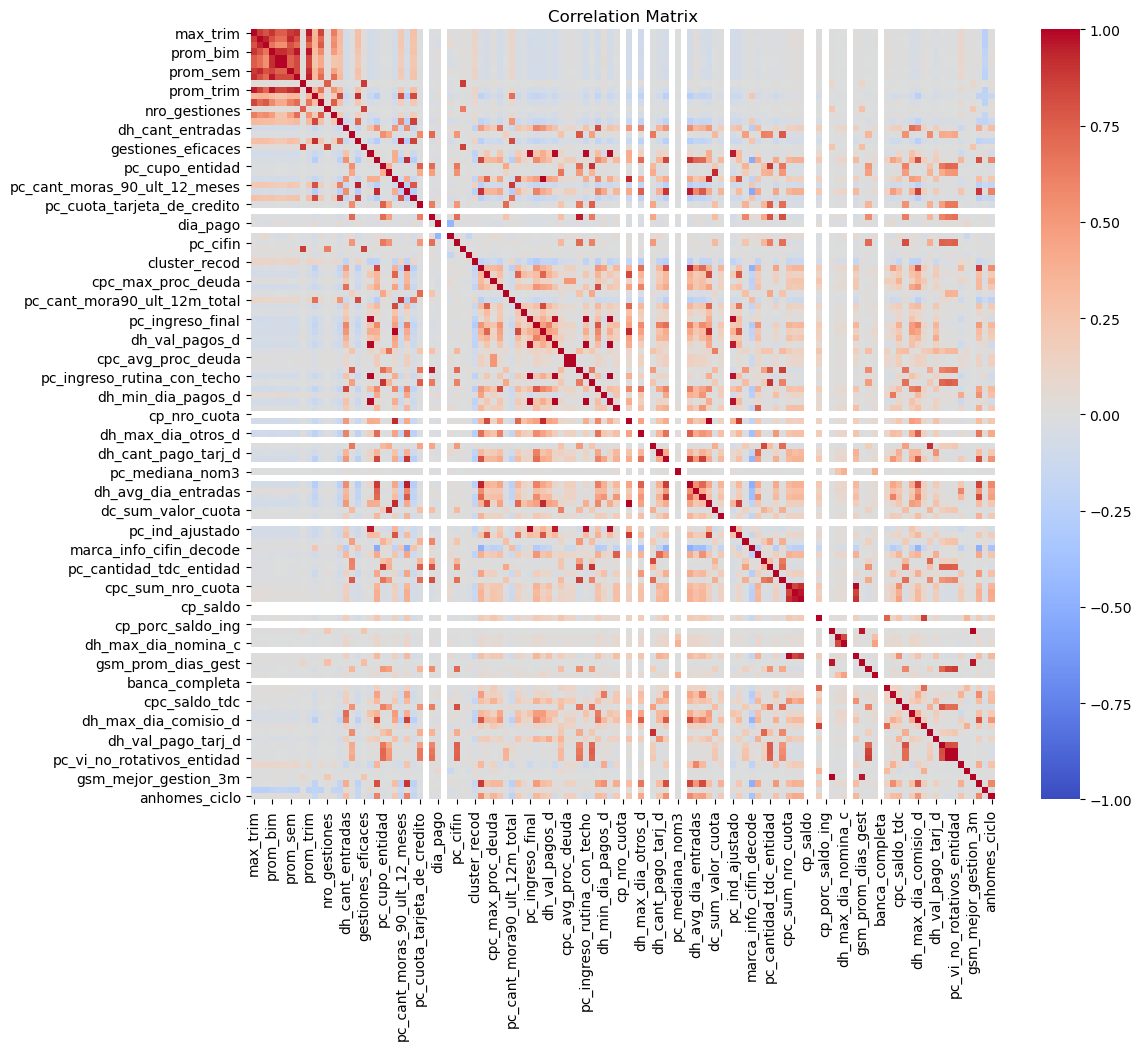

In [14]:
correlation_matrix = df2.drop(["llave"],axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

Verificamos la correlacion de la variable a predecir con las demas variables

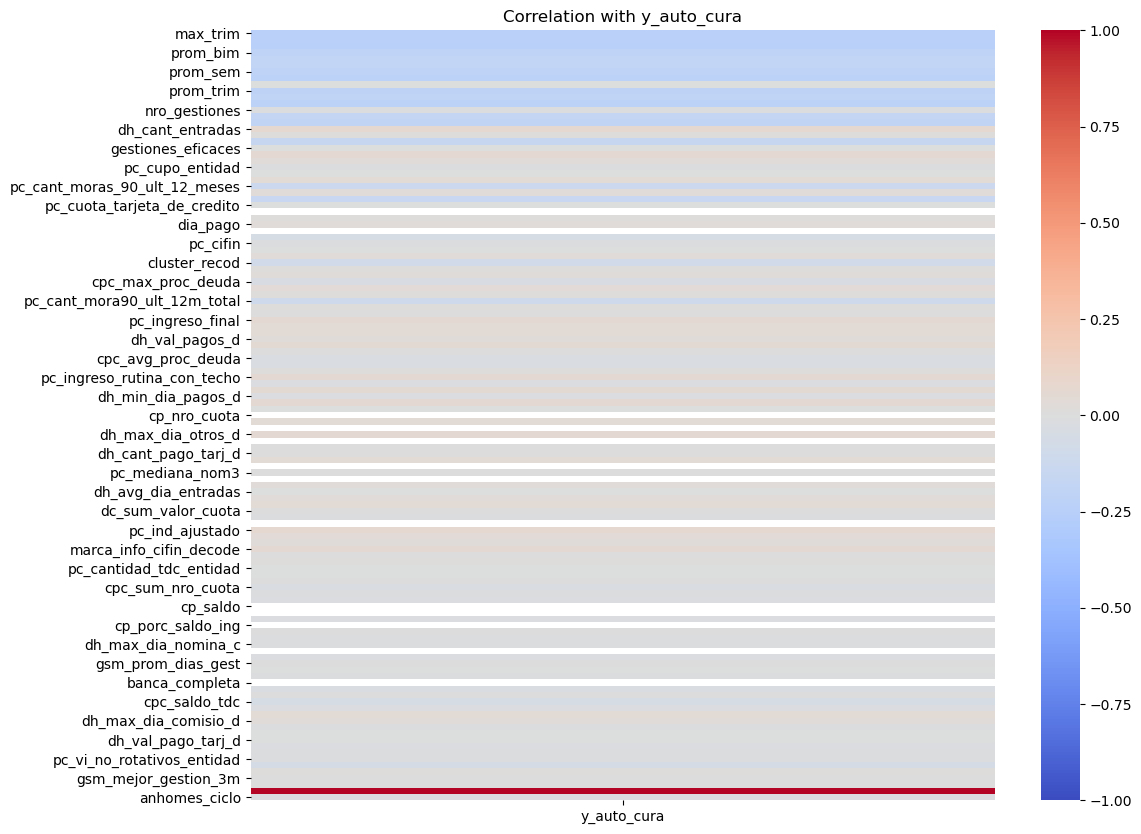

y_auto_cura


In [15]:
prediction_variable = 'y_auto_cura'

correlation_with_y = df2.drop(["llave"], axis=1).corr()[[prediction_variable]]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_with_y, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=False, annot_kws={"size": 14})
plt.title(f"Correlation with {prediction_variable}")
plt.show()
print(max(correlation_with_y))

Exploramos la distribucion rapidamente de cada variable, para verificar sus distribuciones y valores atipicos

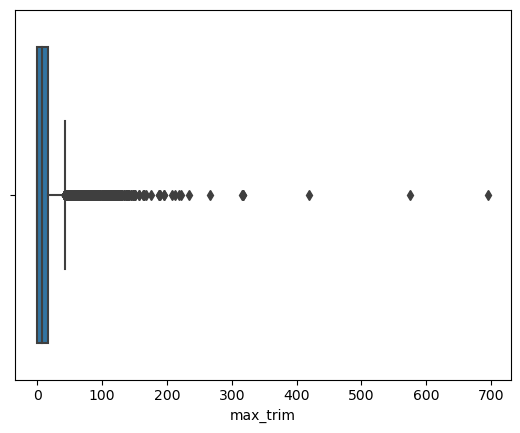

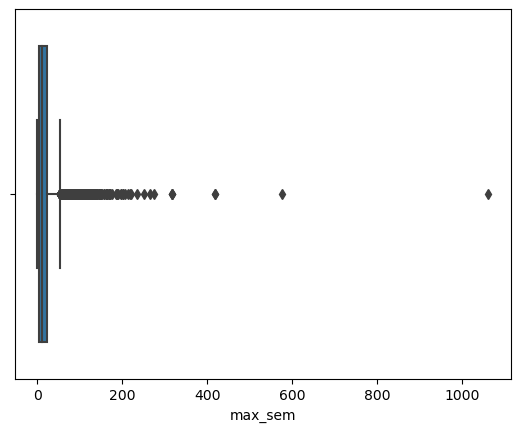

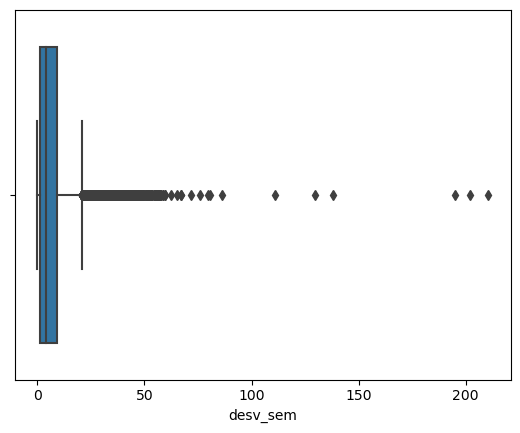

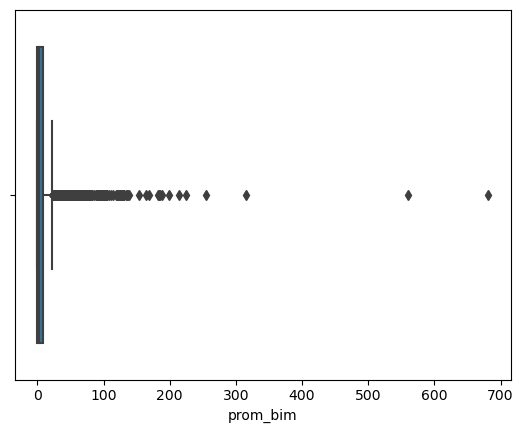

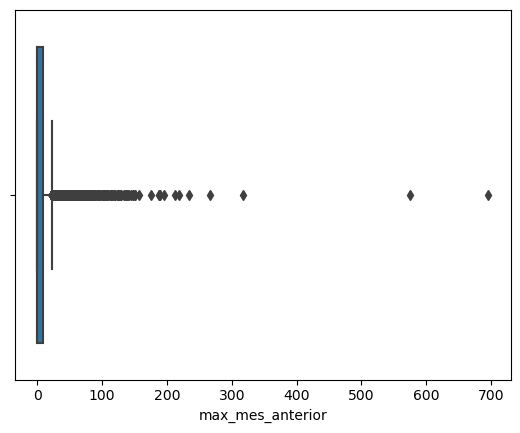

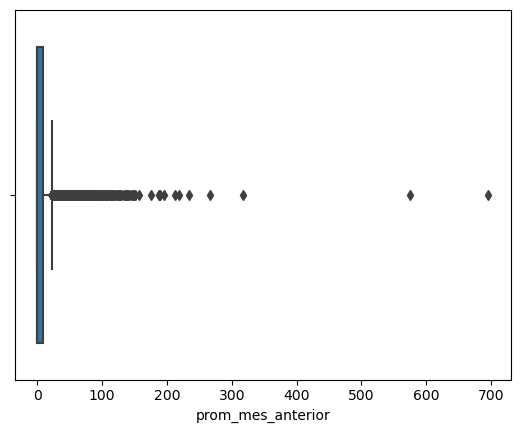

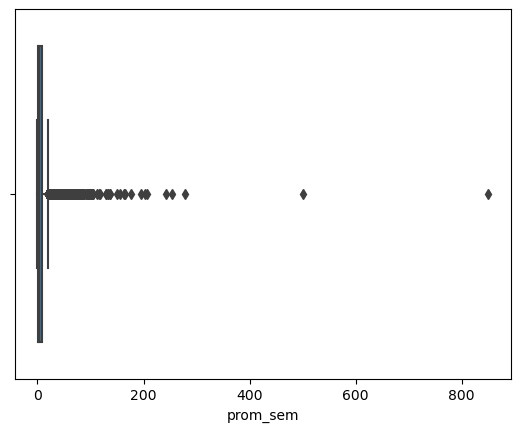

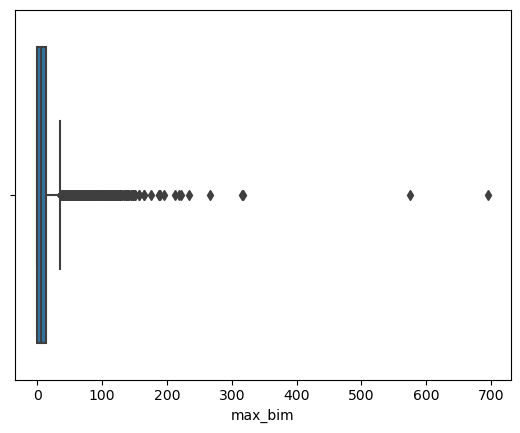

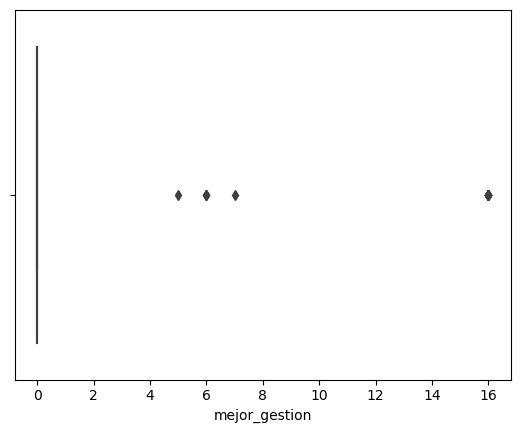

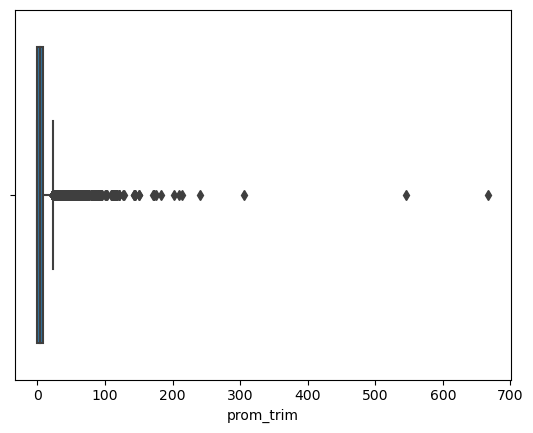

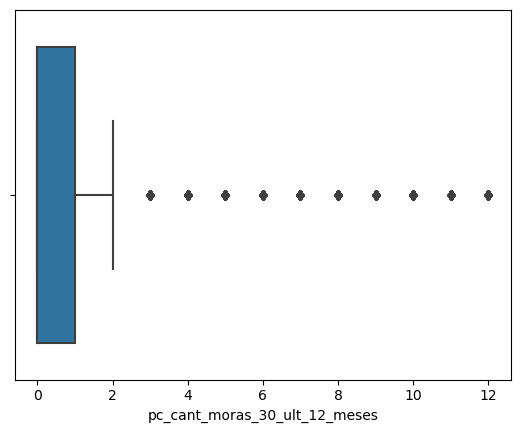

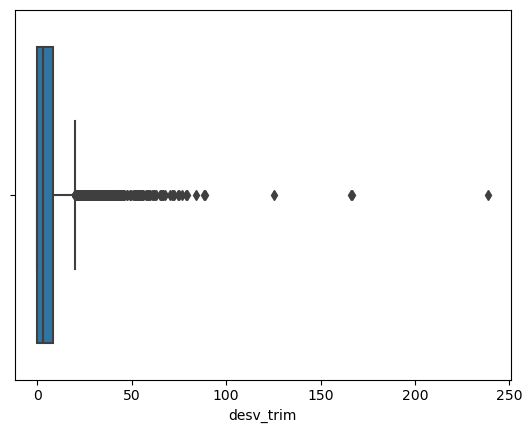

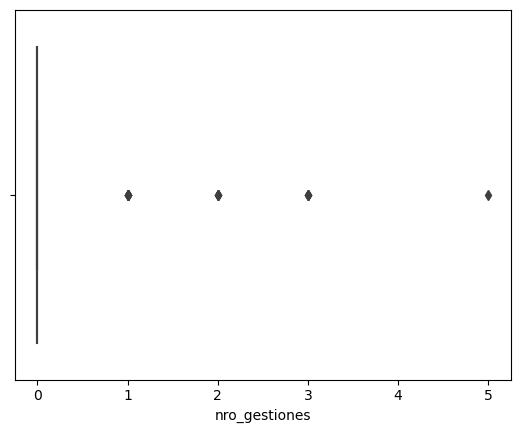

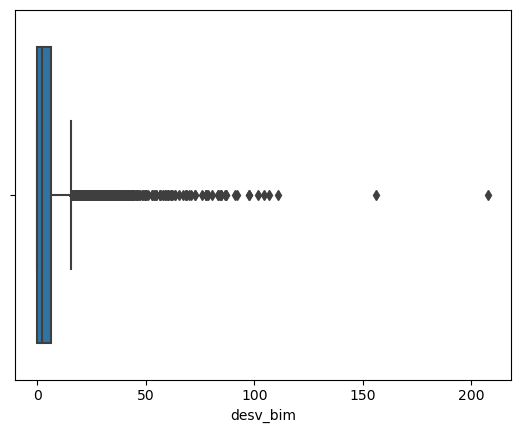

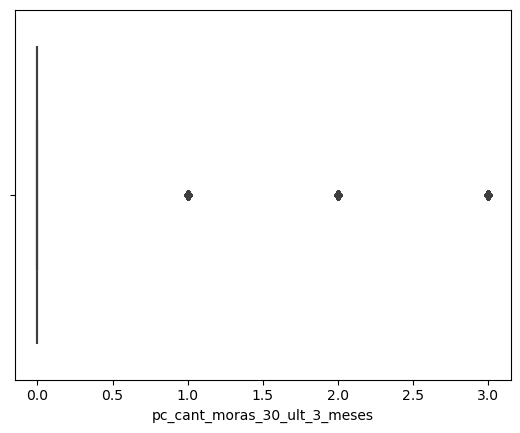

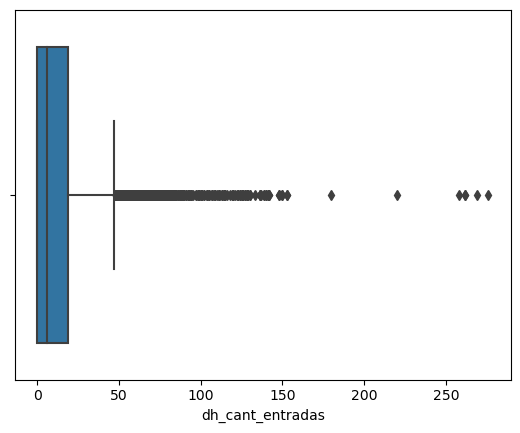

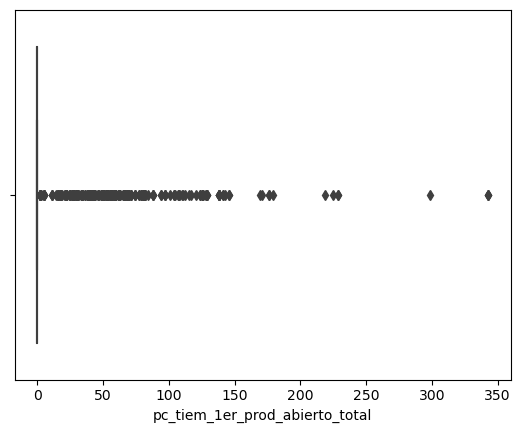

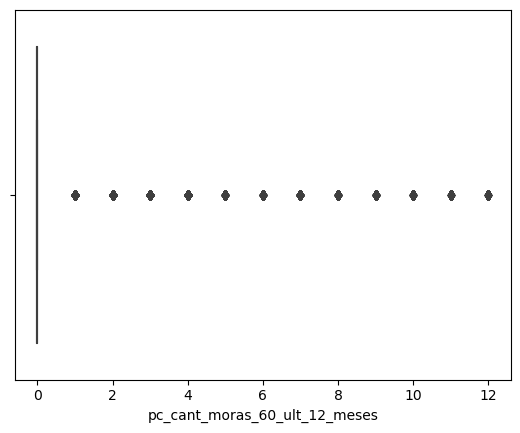

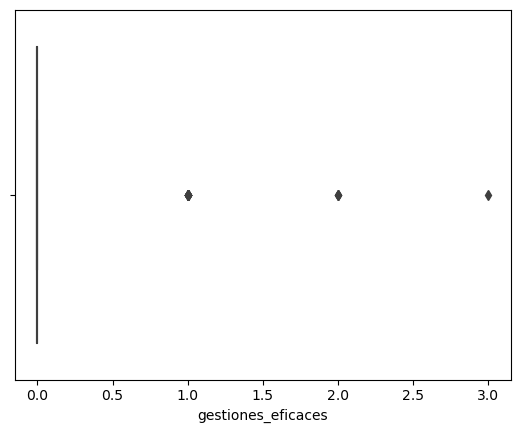

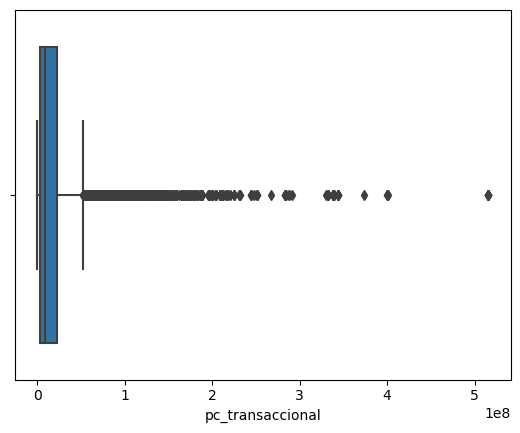

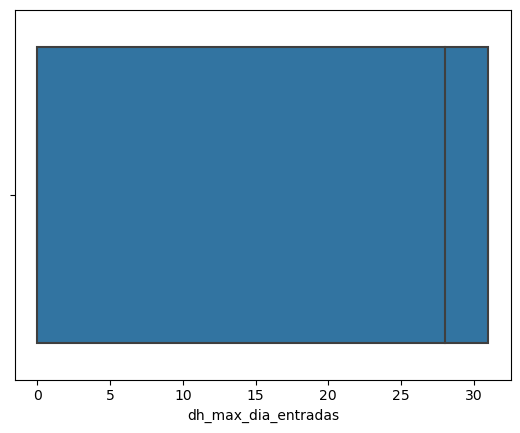

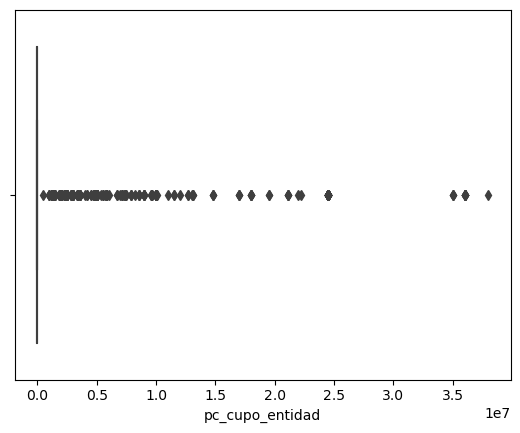

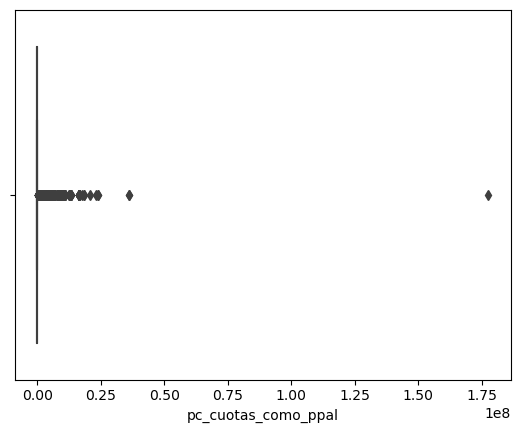

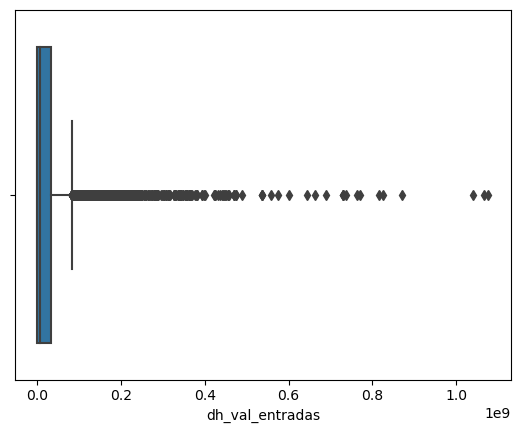

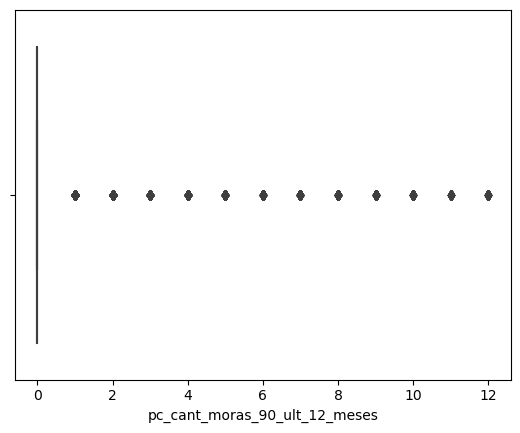

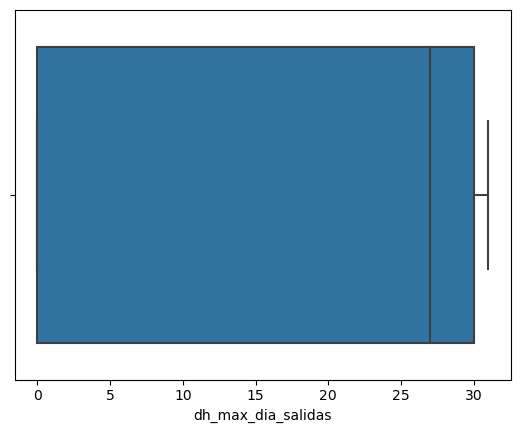

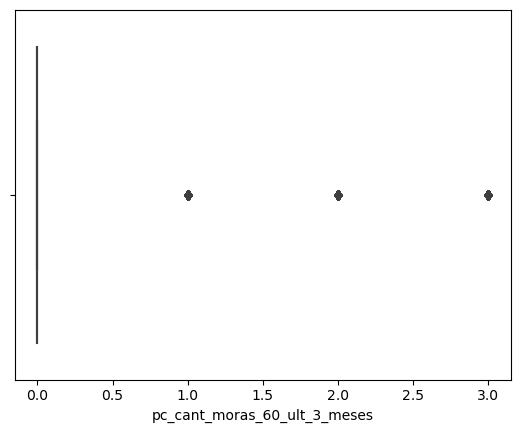

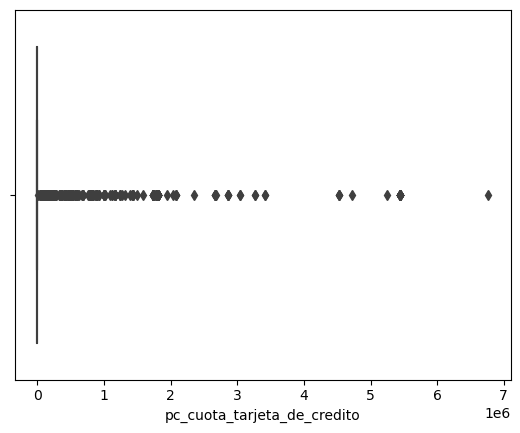

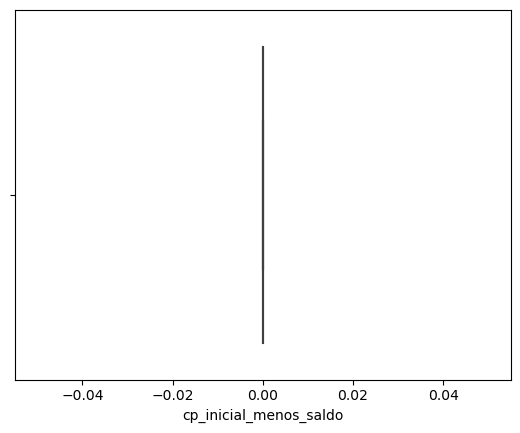

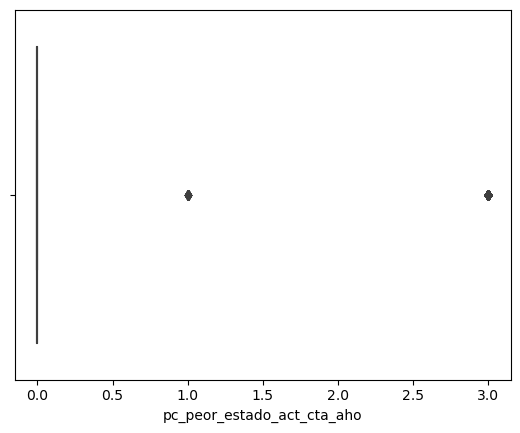

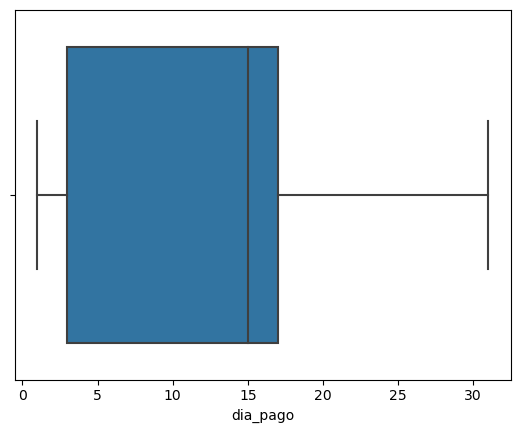

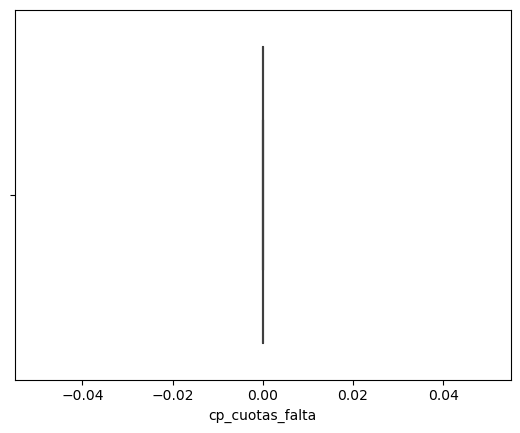

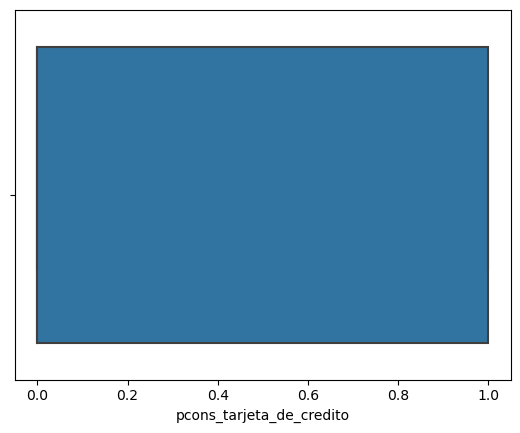

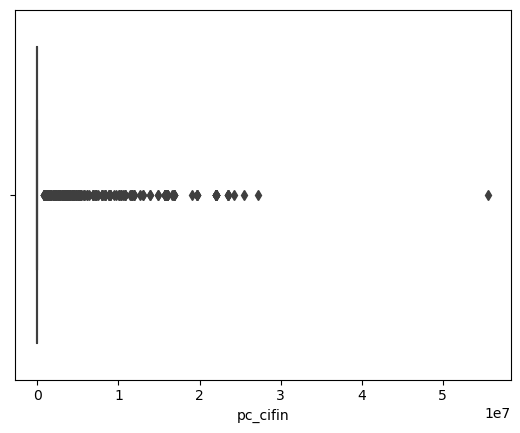

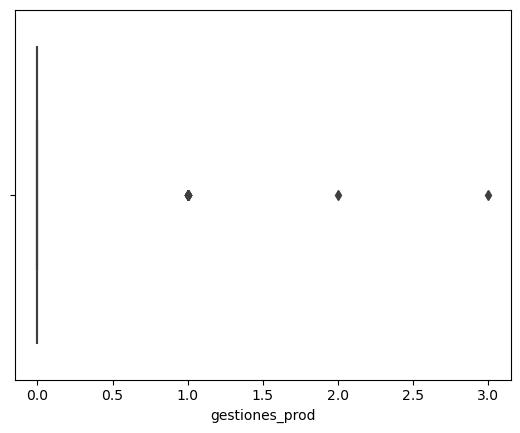

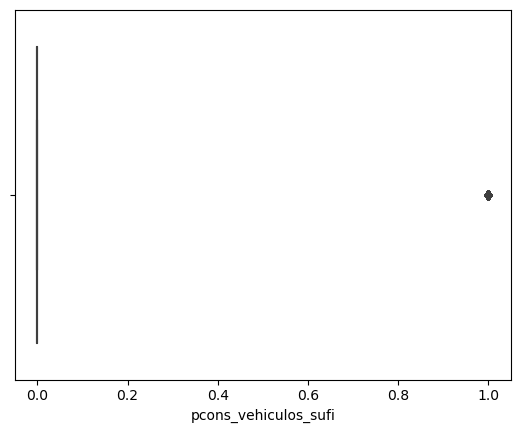

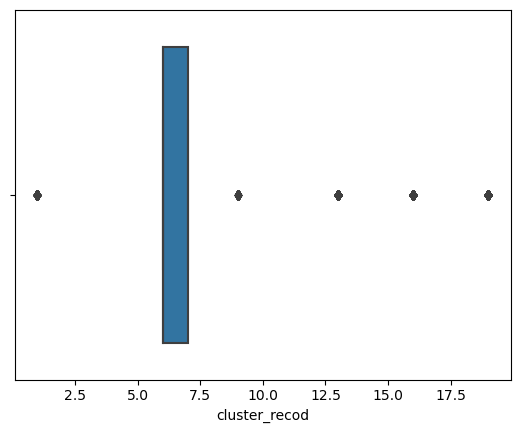

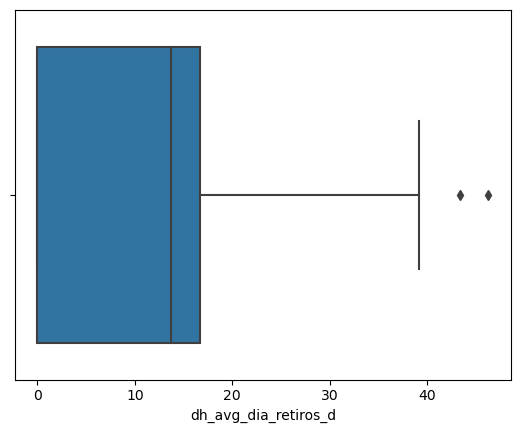

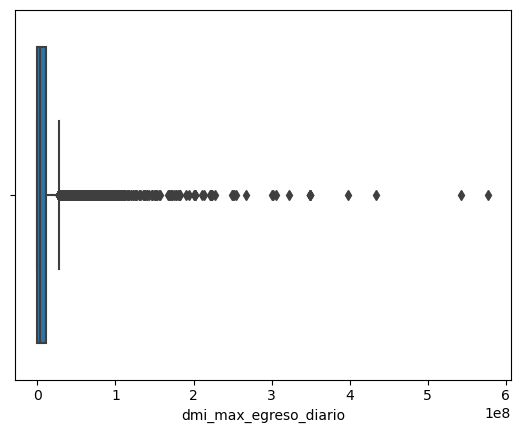

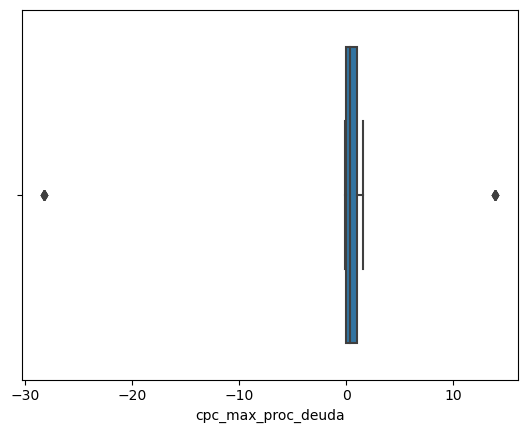

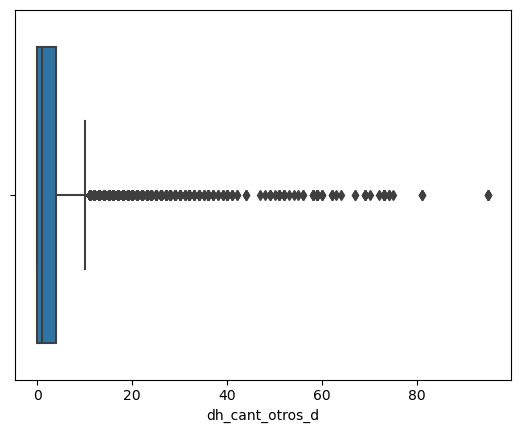

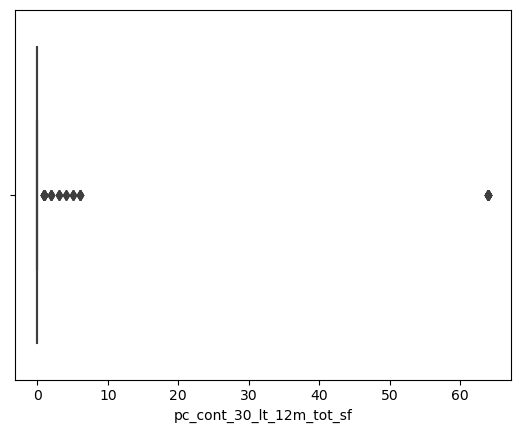

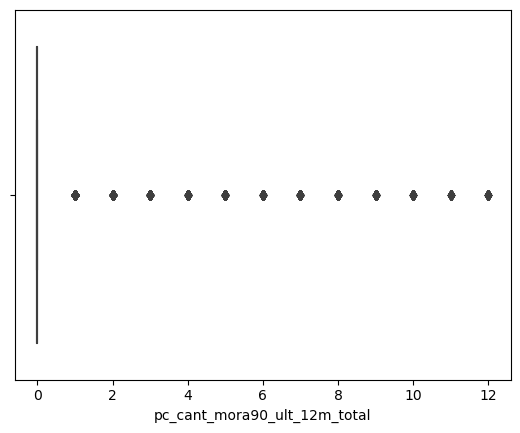

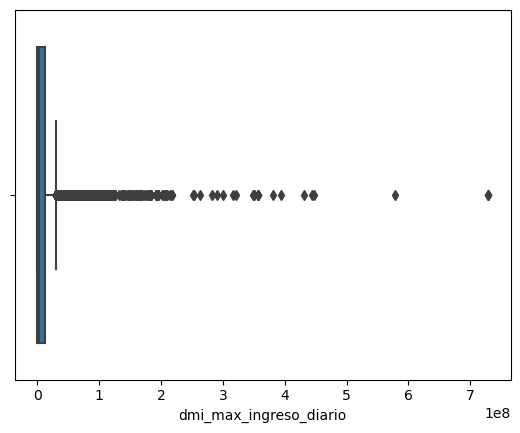

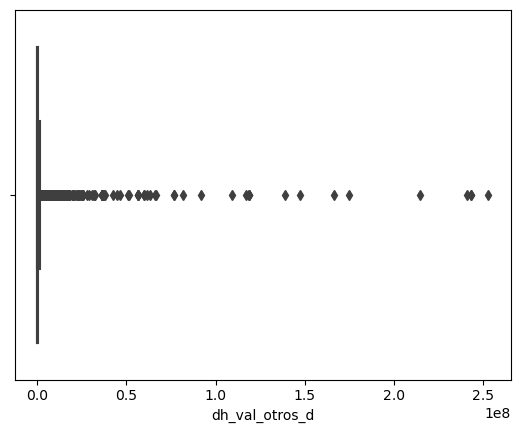

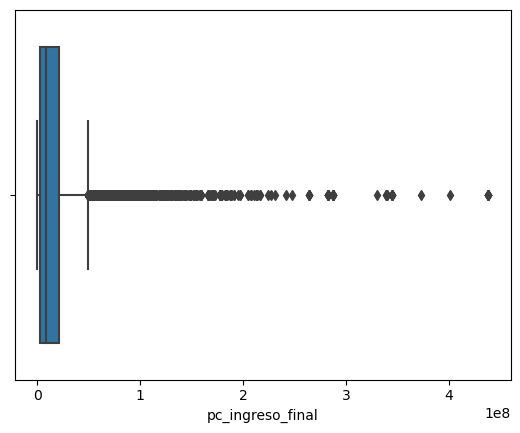

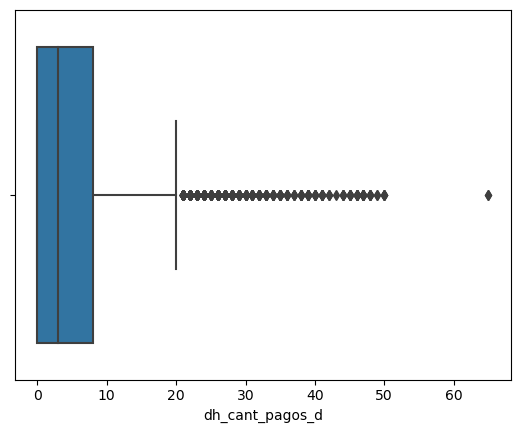

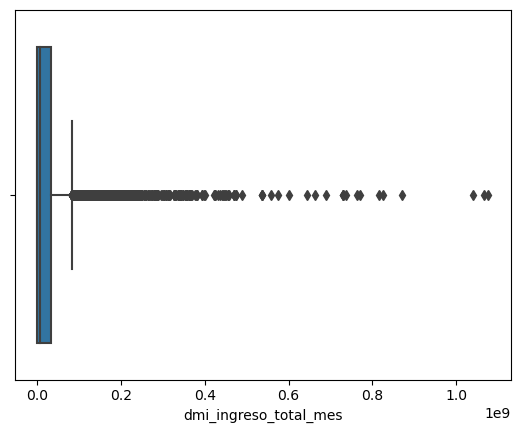

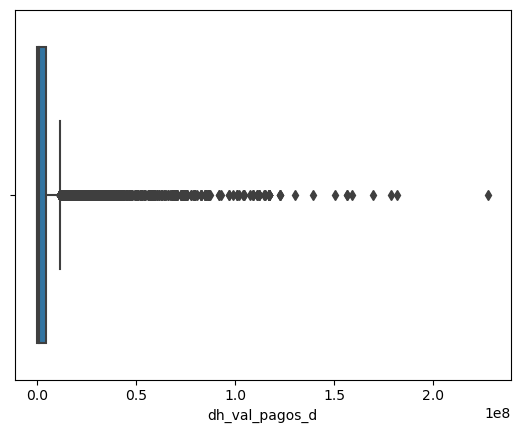

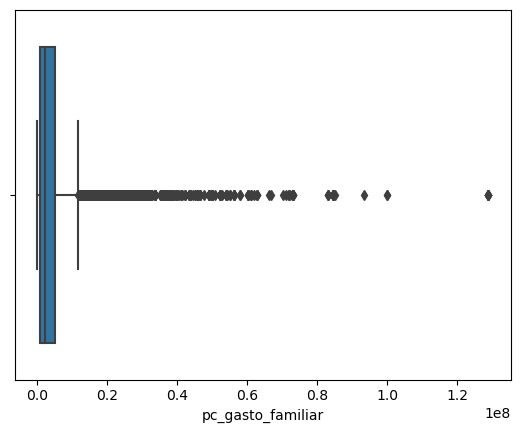

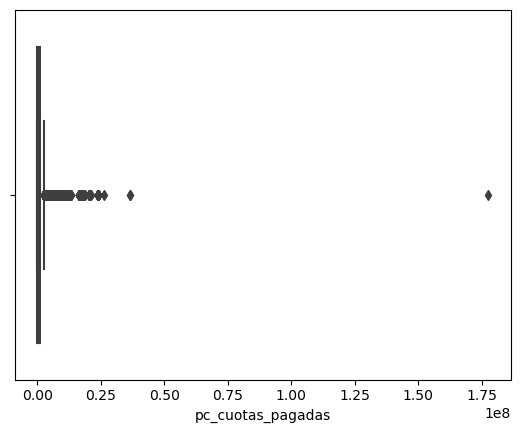

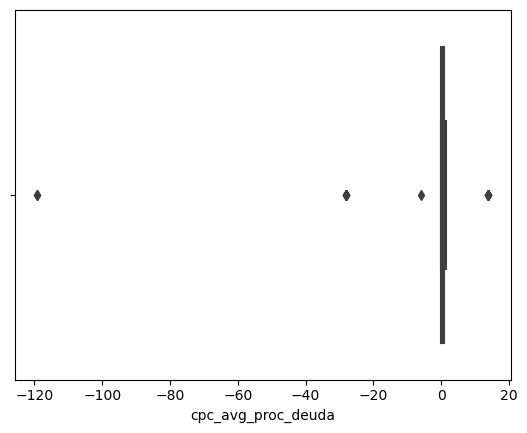

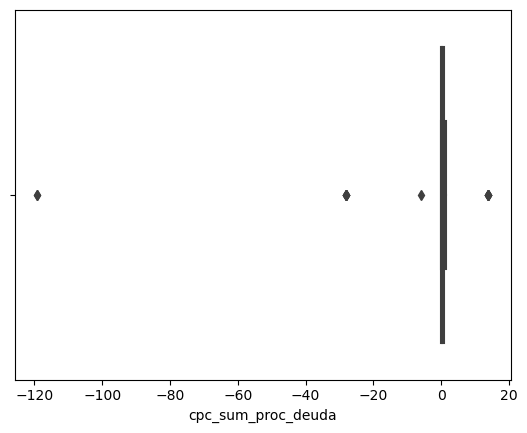

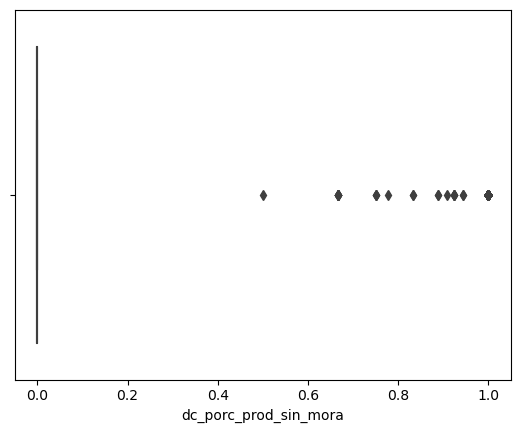

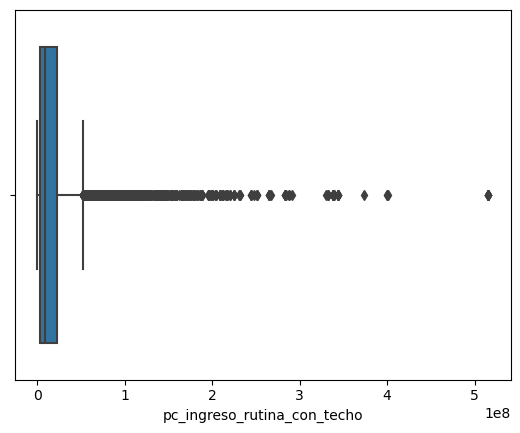

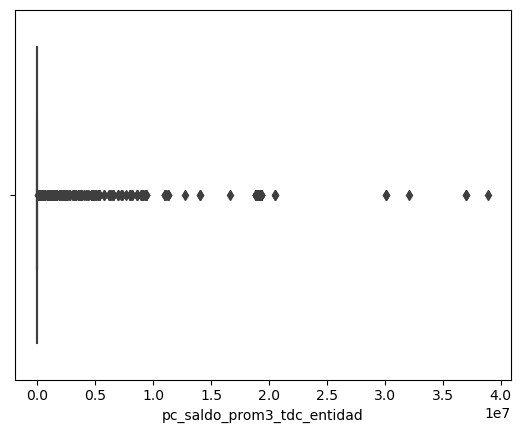

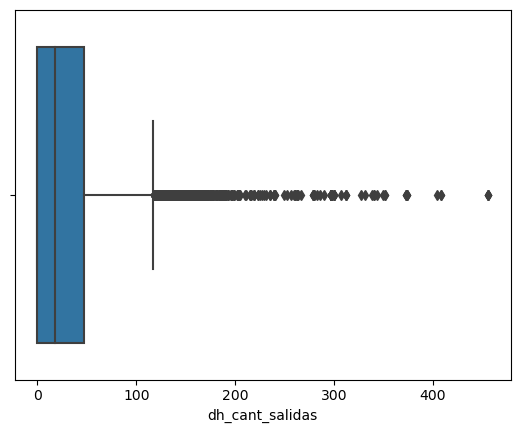

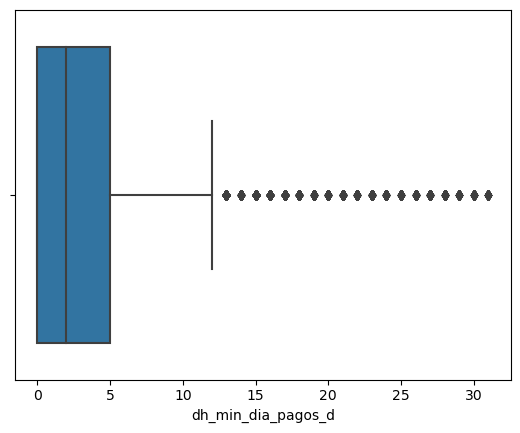

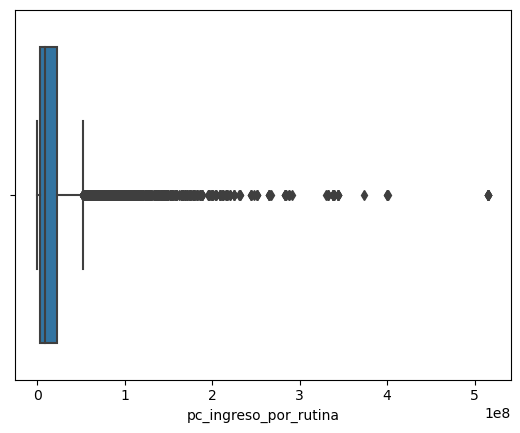

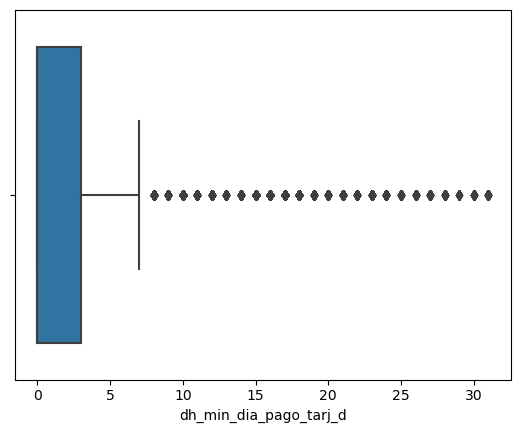

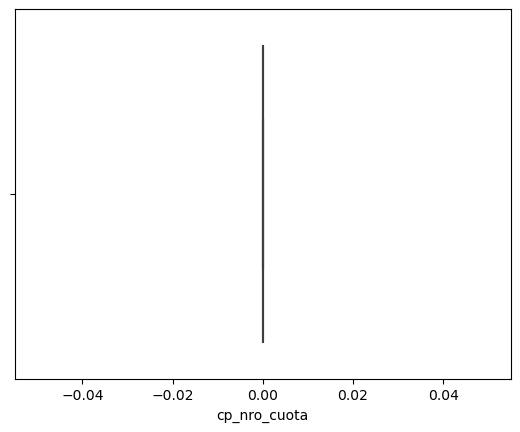

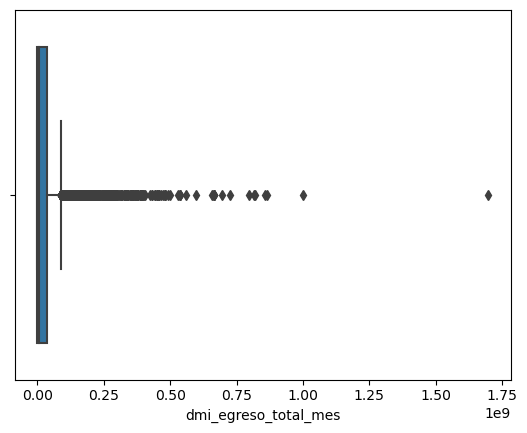

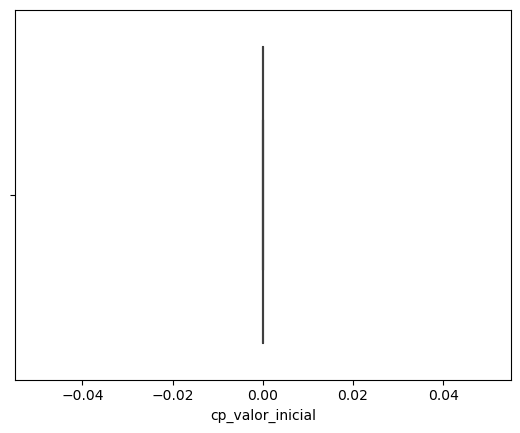

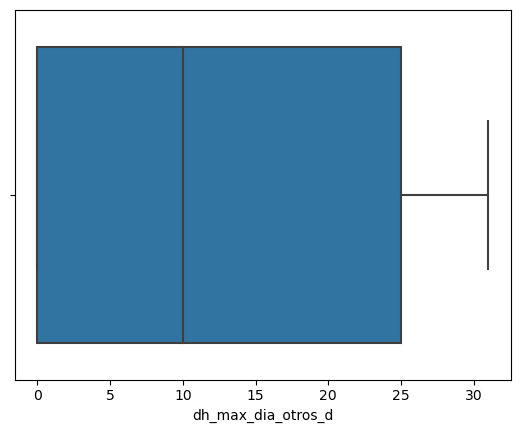

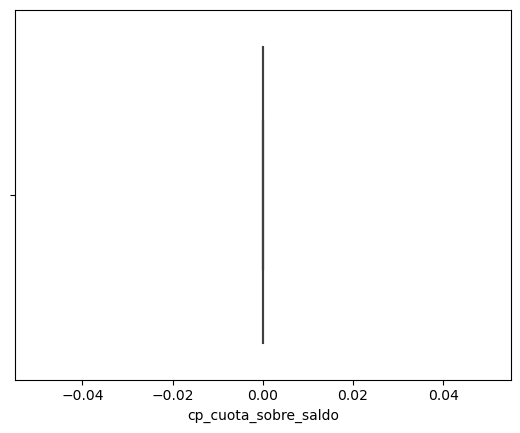

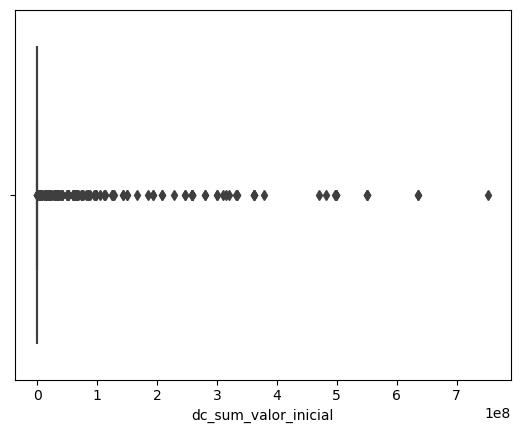

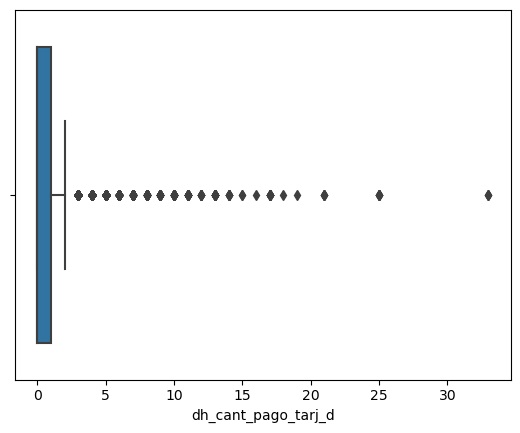

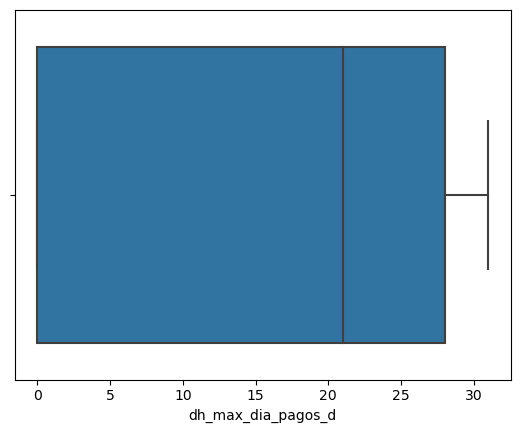

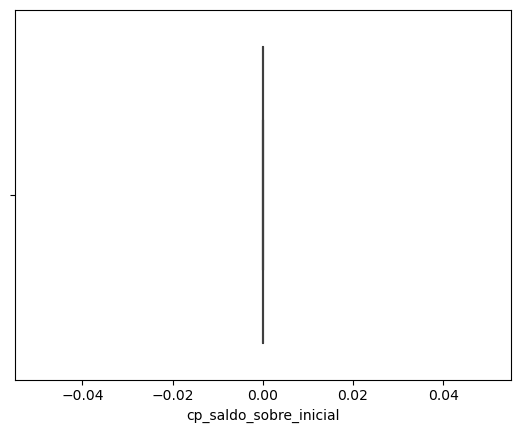

In [140]:
for i in range(X2.shape[1]):
    sns.boxplot(data=X, x=X.iloc[:,i])
    plt.show()

Verificamos el balance de las clases en el dataset, y verificamos que hay un desbalance importante

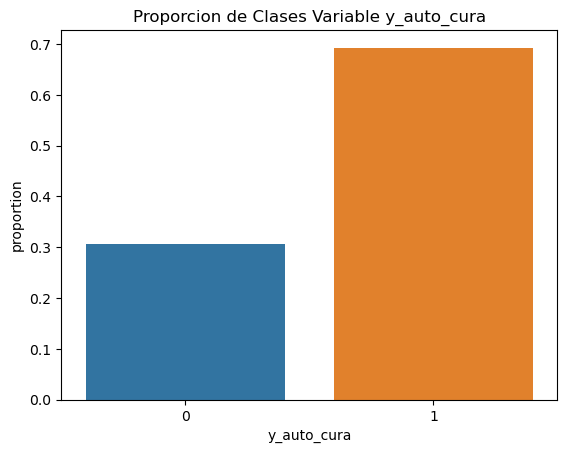

In [16]:
sns.barplot(x=df2.y_auto_cura.value_counts(normalize=True).index, y=df2.y_auto_cura.value_counts(normalize=True))
plt.title("Proporcion de Clases Variable y_auto_cura")
plt.show()

### Modelo utilizando todas las variables

In [180]:
X = df2.drop(["y_auto_cura","llave"], axis=1)
y = df2["y_auto_cura"]

Estandarizamos las variables para eliminar cualquier sesgo y mejorar los modelos

In [181]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.30060048, -0.41549606, -0.44362621, ..., -0.01026032,
        -1.33689244, -1.19195054],
       [ 0.20831984,  0.02379085,  0.14050498, ..., -0.01026032,
         0.40491412, -1.12788923],
       [ 0.71724016,  0.858436  ,  0.77864177, ..., -0.01026032,
         0.73902799,  0.87936508],
       ...,
       [-0.65684471, -0.72299691, -0.79254057, ..., -0.01026032,
         0.14716315,  0.90071884],
       [-0.40238455, -0.50335345, -0.54331603, ..., -0.01026032,
         0.64834201,  0.92207261],
       [-0.65684471, -0.72299691, -0.79254057, ..., -0.01026032,
         0.14716315,  0.90071884]])

Separamos el conjunto de datos en train y test para poder evaluar el performance de los modelos

In [182]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2023, stratify=y)

Entrenamos varios modelos base para verificar cuales tienen potencial para ser entrenados de manera mas exhaustiva

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': Sequential(),
    "XGBoost":XGBClassifier()
}

for name, model in models.items():
    if name == 'Neural Network':
        model.add(Dense(128, input_dim=X_scaled_train.shape[1], activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation = "relu"))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation = "relu"))
        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy","AUC"])
        history = model.fit(X_scaled_train, y_train, epochs=20, batch_size=50, verbose=1, validation_split=0.2)
    else:
        model.fit(X_scaled_train, y_train)

C:\Users\juana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/20
244/244 [==============================] - 2s 4ms/step - loss: 0.6199 - accuracy: 0.6909 - auc: 0.6218 - val_loss: 0.5720 - val_accuracy: 0.7197 - val_auc: 0.6875
Epoch 2/20
244/244 [==============================] - 1s 3ms/step - loss: 0.5799 - accuracy: 0.7100 - auc: 0.6752 - val_loss: 0.5673 - val_accuracy: 0.7197 - val_auc: 0.6953
Epoch 3/20
244/244 [==============================] - 1s 3ms/step - loss: 0.5733 - accuracy: 0.7125 - auc: 0.6906 - val_loss: 0.5645 - val_accuracy: 0.7240 - val_auc: 0.7017
Epoch 4/20
244/244 [==============================] - 1s 3ms/step - loss: 0.5670 - accuracy: 0.7158 - auc: 0.6993 - val_loss: 0.5593 - val_accuracy: 0.7224 - val_auc: 0.7047
Epoch 5/20
244/244 [==============================] - 1s 3ms/step - loss: 0.5624 - accuracy: 0.7206 - auc: 0.7088 - val_loss: 0.5584 - val_accuracy: 0.7250 - val_auc: 0.7056
Epoch 6/20
244/244 [==============================] - 1s 3ms/step - loss: 0.5600 - accuracy: 0.7169 - auc: 0.7100 - val_loss: 0.55

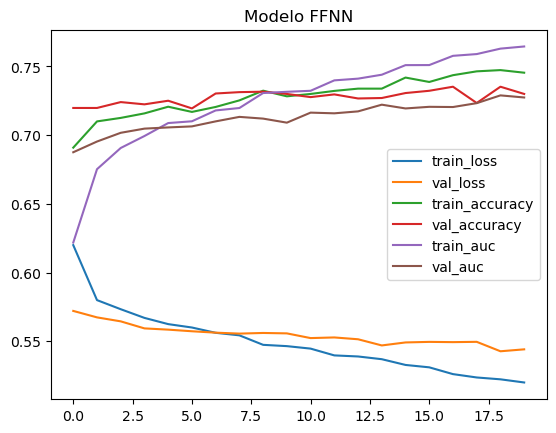

In [21]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['auc'], label='train_auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.legend()
plt.title("Modelo FFNN")
plt.show()

Verificamos que los que les fue mejor en este caso fueron los basados en arboles como XGBoost y las redes neuronales

In [22]:
for name, model in models.items():
    if name == 'Neural Network':
        loss, accuracy, roc = model.evaluate(X_scaled_test, y_test, verbose=1)
        print(f'{name} - Accuracy: {accuracy}')
        print(f'{name} - ROC-AUC: {roc}')
    else:
        y_pred = model.predict(X_scaled_test)
        acc = accuracy_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        print(f'{name} - Accuracy: {acc}')
        print(f'{name} - ROC: {roc}')

Logistic Regression - Accuracy: 0.7210526315789474
Logistic Regression - ROC: 0.5855214535537328
SVM - Accuracy: 0.7347368421052631
SVM - ROC: 0.5975428862888787
Decision Tree - Accuracy: 0.6971052631578948
Decision Tree - ROC: 0.6456208102593997
Random Forest - Accuracy: 0.7728947368421053
Random Forest - ROC: 0.6889026522879628
119/119 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7450 - auc: 0.7513
Neural Network - Accuracy: 0.7450000047683716
Neural Network - ROC-AUC: 0.7512961030006409
XGBoost - Accuracy: 0.7647368421052632
XGBoost - ROC: 0.6839660448848732


119/119 [==============================] - 0s 1ms/step


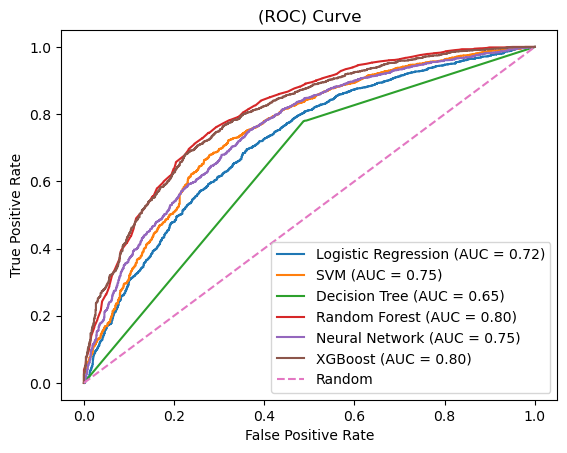

In [23]:
for name, model in models.items():
    if name == 'Neural Network':
        y_pred_prob = model.predict(X_scaled_test)
        auc = roc_auc_score(y_test, y_pred_prob)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    else:
        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_scaled_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_prob)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        else: 
            y_pred_decision = model.decision_function(X_scaled_test)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
            auc = roc_auc_score(y_test, y_pred_decision)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()

El modelo elegido es la Red Neuronal, ya que es el modelo que es más prometedor para poder mejorar su ROC-AUC

In [ ]:
!pip install scikeras

### NN Hyperparameter tuning

Vamos a buscar los mejores hiperparametros para los modelos elegidos

In [124]:
# Define la función que crea el modelo
def create_model(neurons1=128, dropout1=0.3, neurons2=64, dropout2=0.3, neurons3=32, dropout3=0.3, learn_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_scaled_train.shape[1], activation='relu'))
    model.add(Dropout(dropout1))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout2))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dropout(dropout3))
    model.add(Dense(1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["AUC"])
    return model

# Crear el modelo KerasClassifier
model = KerasClassifier(model=create_model, verbose=0, epochs=20, batch_size=50, validation_split=0.2)

# Definir los parámetros para la búsqueda en cuadrícula
param_grid ={
    'model__neurons1': [64, 128, 256],
    'model__dropout1': [0.2, 0.3],
    'model__neurons2': [32, 64, 128],
    'model__dropout2': [0.2, 0.3],
    'model__neurons3': [16, 32, 64],
    'model__dropout3': [0.2, 0.3]
}

# Usar validación cruzada estratificada
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=2023)

# Configurar GridSearchCV
gridnn = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='roc_auc', cv=kfold)

# Realizar la búsqueda en cuadrícula
grid_result = gridnn.fit(X_scaled_train, y_train)

# Mostrar resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor: 0.727969 usando {'model__neurons3': 32, 'model__neurons2': 64, 'model__neurons1': 128, 'model__dropout3': 0.2, 'model__dropout2': 0.2, 'model__dropout1': 0.3}


In [152]:
best_model = grid_result.best_estimator_

predictions = best_model.predict(X_scaled_test)
binary_predictions = (predictions > 0.5).astype(int)
acc = accuracy_score(y_test, binary_predictions)
roc = roc_auc_score(y_test, binary_predictions)
print(acc)
print(roc)

0.7431578947368421
0.639815026855977


In [156]:
joblib.dump(best_model, "base_learner.pkl")

INFO:tensorflow:Assets written to: C:\Users\juana\AppData\Local\Temp\tmpkmk5g9rb\assets


INFO:tensorflow:Assets written to: C:\Users\juana\AppData\Local\Temp\tmpkmk5g9rb\assets


['base_learner.pkl']

In [126]:
report = classification_report(y_test, binary_predictions)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.37      0.47      1168
           1       0.77      0.91      0.83      2632

    accuracy                           0.74      3800
   macro avg       0.70      0.64      0.65      3800
weighted avg       0.73      0.74      0.72      3800



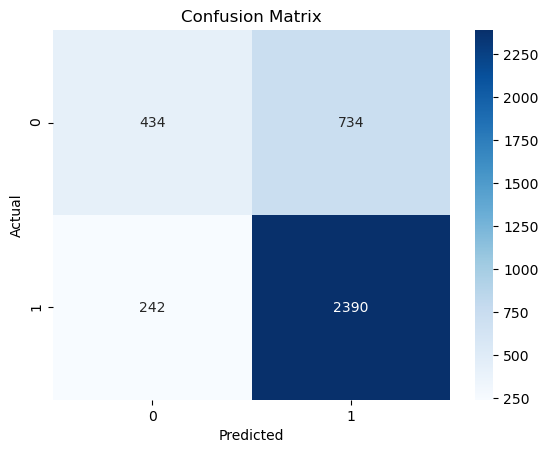

In [127]:
cm = confusion_matrix(y_test, binary_predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Modelo XGBoost

In [24]:
xgb = XGBClassifier()
xgb.fit(X_scaled_train, y_train)

y_pred = xgb.predict(X_scaled_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print(f'{name} - Accuracy: {acc}')
print(f'{name} - ROC: {roc}')

XGBoost - Accuracy: 0.7647368421052632
XGBoost - ROC: 0.6839660448848732


In [25]:

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=2023)

param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 100),
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.linspace(0.5, 1.0, 100),
    'colsample_bytree': np.linspace(0.5, 1.0, 100),
}

# Configurar la búsqueda aleatoria
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100, 
    scoring='roc_auc',  
    cv=3,  
    verbose=2,
    n_jobs=-1
)

# Realizar la búsqueda aleatoria
random_search_xgb.fit(X_scaled_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search_xgb.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
accuracy = random_search_xgb.best_estimator_.score(X_scaled_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros encontrados:
{'subsample': 0.9242424242424243, 'n_estimators': 110, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.08323232323232323, 'colsample_bytree': 0.7828282828282829}
Precisión en el conjunto de prueba: 0.7792105263157895


In [26]:
xgboostBest = random_search_xgb.best_estimator_
y_pred_proba_xgb = xgboostBest.predict_proba(X_scaled_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_xgb}")
y_pred_xgb = xgboostBest.predict(X_scaled_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy en el conjunto de prueba: {acc_xgb}")



ROC-AUC en el conjunto de prueba: 0.8149988810009576
Accuracy en el conjunto de prueba: 0.7792105263157895


In [157]:
joblib.dump(xgboostBest, "meta_learner.pkl")

['meta_learner.pkl']

In [27]:
report_xgb = classification_report(y_test, y_pred_xgb)

print(report_xgb)

              precision    recall  f1-score   support

           0       0.71      0.47      0.57      1168
           1       0.80      0.91      0.85      2632

    accuracy                           0.78      3800
   macro avg       0.75      0.69      0.71      3800
weighted avg       0.77      0.78      0.76      3800



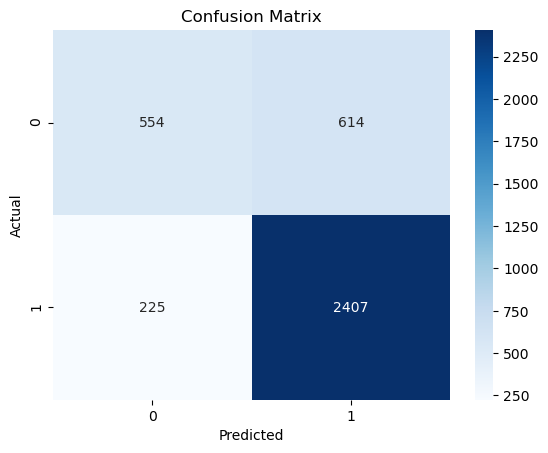

In [28]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Modelo Stack

Realizamos un modelo Ensemble stacking que basicamente es poder usar la prediccion de modelos anteriores como input de un modelo final

In [160]:
y_pred_proba_nn2_prob_train1= best_model.predict(X_scaled_train)
y_pred_proba_nn2_train1 = (y_pred_proba_nn2_prob_train1 > 0.5).astype(int)
y_pred_proba_nn2_prob_test1= best_model.predict(X_scaled_test)
y_pred_proba_nn2_test1 = (y_pred_proba_nn2_prob_test1 > 0.5).astype(int)

X_scaled_train_stack1 = np.column_stack([X_scaled_train, y_pred_proba_nn2_train1])
X_scaled_test_stack1 = np.column_stack([X_scaled_test, y_pred_proba_nn2_test1])

xgboostBest.fit(X_scaled_train_stack1, y_train)

y_pred_proba_xgb2_stack1 = xgboostBest.predict_proba(X_scaled_test_stack1)[:, 1]
roc_auc_xgb2_stack1 = roc_auc_score(y_test, y_pred_proba_xgb2_stack1)
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_xgb2_stack1}")
y_pred_xgb2_stack1 = xgboostBest.predict(X_scaled_test_stack1)
acc_xgb2_stack1 = accuracy_score(y_test, y_pred_xgb2_stack1)
print(f"Accuracy en el conjunto de prueba: {acc_xgb2_stack1}")

ROC-AUC en el conjunto de prueba: 0.8145153367926885
Accuracy en el conjunto de prueba: 0.7773684210526316


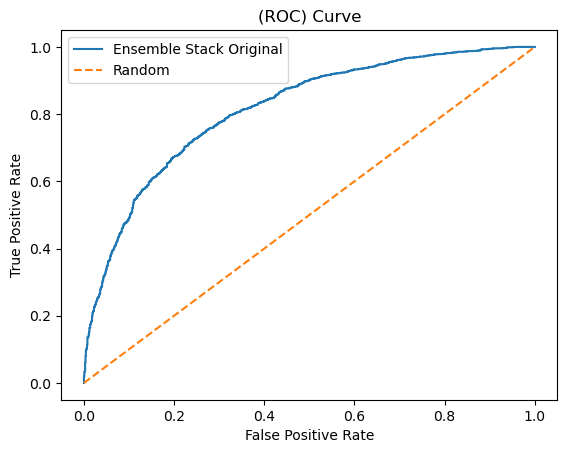

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb2_stack1)
plt.plot(fpr, tpr, label="Ensemble Stack Original")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend()
plt.show()

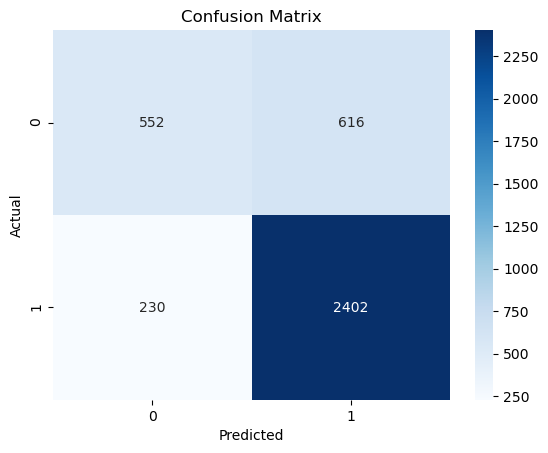

In [143]:
cm_stack1 = confusion_matrix(y_test, y_pred_xgb2_stack1)

sns.heatmap(cm_stack1, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance

Verificamos si nos beneficia en performance poder eliminar cierto numero de columnas al tener menor importancia con respecto a la variable a predecir

Model Accuracy: 0.7763157894736842


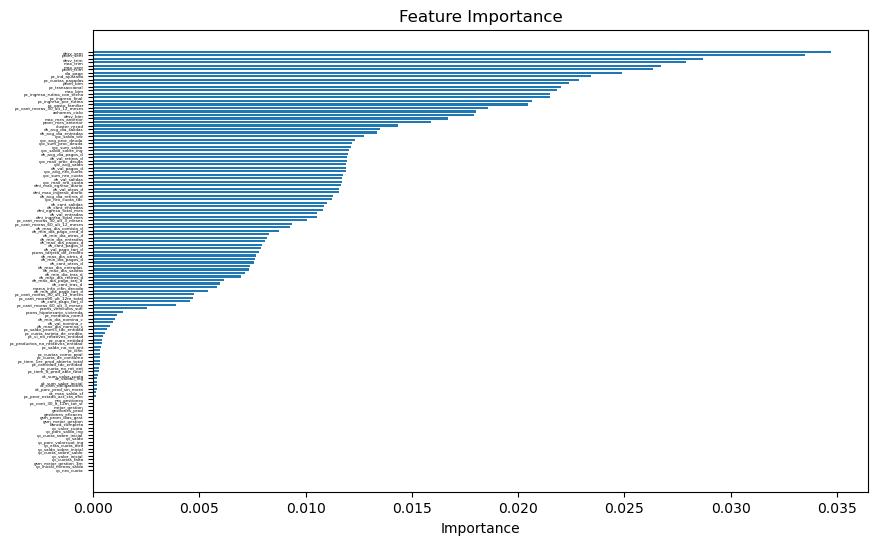

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_scaled_train, y_train)

accuracy = clf.score(X_scaled_test, y_test)
print(f'Model Accuracy: {accuracy}')

feature_importance = clf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

bar_width = 0.6
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], height=bar_width)
plt.xlabel('Importance')
plt.tick_params(axis='y', labelsize=3)
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

Se decide eliminar todas las variables que tengan una importancia menor al 0.005

Numero de columnas resultantes:  69
Percentage of variance represented by selected features: 96.78%


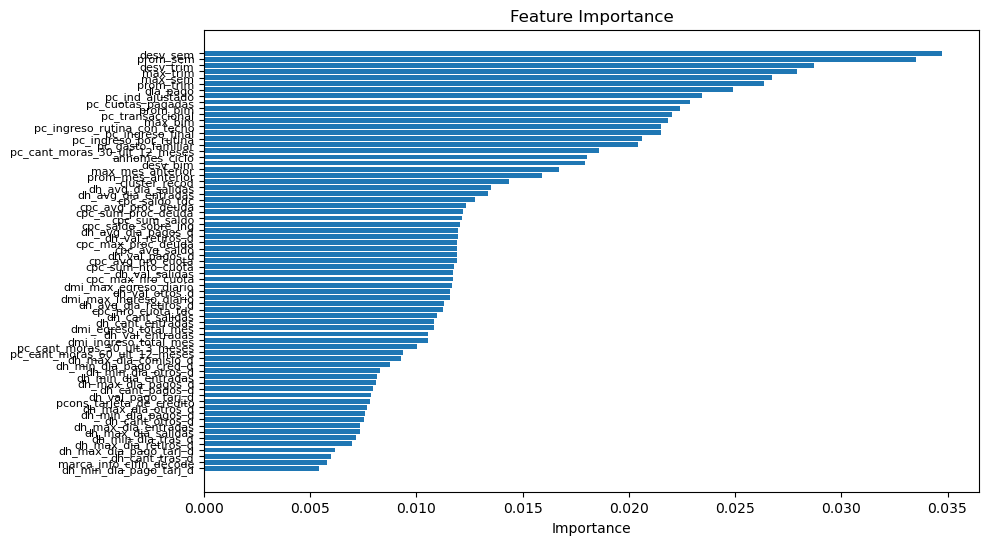

In [48]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.005]

cumulative_importance = selected_features['Importance'].cumsum()

print("Numero de columnas resultantes: ", len(selected_features))

print(f"Percentage of variance represented by selected features: {cumulative_importance.iloc[-1] * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 

plt.tick_params(axis='y', labelsize=8)

plt.show()

In [41]:
X2 = X[selected_features["Feature"]]
scaler = StandardScaler()

X2_scaled = scaler.fit_transform(X2)
X2_scaled_train, X2_scaled_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=2023, stratify=y)

Se vuelven a entrenar los modelos con el nuevo dataset para ver si esto mejora el rendimiento

### XGBoost 2

In [44]:
xgb_model2 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=2023)

param_dist2 = {
    'learning_rate': np.linspace(0.01, 0.3, 100),
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.linspace(0.5, 1.0, 100),
    'colsample_bytree': np.linspace(0.5, 1.0, 100),
}

# Configurar la búsqueda aleatoria
random_search_xgb2 = RandomizedSearchCV(
    xgb_model2,
    param_distributions=param_dist2,
    n_iter=100,
    scoring='roc_auc', 
    cv=5, 
    verbose=2,
    n_jobs=-1 
)

# Realizar la búsqueda aleatoria
random_search_xgb2.fit(X2_scaled_train, y2_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search_xgb2.best_params_)

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
accuracy2 = random_search_xgb2.best_estimator_.score(X2_scaled_test, y2_test)
print(f"Precisión en el conjunto de prueba: {accuracy2}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros encontrados:
{'subsample': 0.7474747474747475, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.04515151515151515, 'colsample_bytree': 0.9141414141414141}
Precisión en el conjunto de prueba: 0.7692105263157895


In [47]:
xgboostBest2 = random_search_xgb2.best_estimator_
y_pred_proba_xgb2 = xgboostBest2.predict_proba(X2_scaled_test)[:, 1]
roc_auc_xgb2 = roc_auc_score(y2_test, y_pred_proba_xgb2)
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_xgb2}")
y_pred_xgb2 = xgboostBest2.predict(X2_scaled_test)
acc_xgb2 = accuracy_score(y2_test, y_pred_xgb2)
print(f"Accuracy en el conjunto de prueba: {acc_xgb2}")

ROC-AUC en el conjunto de prueba: 0.8036189209726443
Accuracy en el conjunto de prueba: 0.7692105263157895


In [102]:
report_xgb2 = classification_report(y2_test, y_pred_xgb2)

print(report_xgb2)

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      1168
           1       0.78      0.92      0.85      2632

    accuracy                           0.77      3800
   macro avg       0.74      0.67      0.69      3800
weighted avg       0.76      0.77      0.75      3800



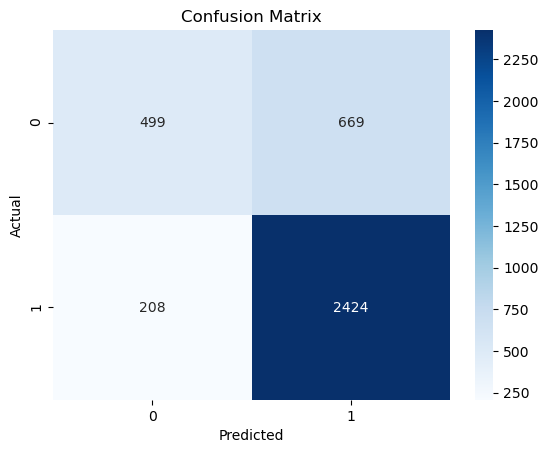

In [115]:
cm_xgb2 = confusion_matrix(y_test, y_pred_xgb2)

sns.heatmap(cm_xgb2, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [103]:
joblib.dump(xgboostBest2, "xgboost.pkl")

['xgboost.pkl']

#### Neural Network

In [132]:
model_nn2 = Sequential()
model_nn2.add(Dense(128, input_dim=X2_scaled_train.shape[1], activation='relu'))
model_nn2.add(Dropout(0.3))
model_nn2.add(Dense(64, activation = "relu"))
model_nn2.add(Dropout(0.2))
model_nn2.add(Dense(32, activation = "relu"))
model_nn2.add(Dropout(0.2))
model_nn2.add(Dense(1, activation='sigmoid'))
model_nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy","AUC"])
history = model_nn2.fit(X2_scaled_train, y2_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/50
190/190 [==============================] - 2s 3ms/step - loss: 0.5986 - accuracy: 0.7002 - auc: 0.6417 - val_loss: 0.5630 - val_accuracy: 0.7230 - val_auc: 0.6923
Epoch 2/50
190/190 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7151 - auc: 0.6896 - val_loss: 0.5663 - val_accuracy: 0.7240 - val_auc: 0.6956
Epoch 3/50
190/190 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7151 - auc: 0.6987 - val_loss: 0.5605 - val_accuracy: 0.7270 - val_auc: 0.7037
Epoch 4/50
190/190 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7161 - auc: 0.7085 - val_loss: 0.5625 - val_accuracy: 0.7237 - val_auc: 0.7058
Epoch 5/50
190/190 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7223 - auc: 0.7180 - val_loss: 0.5590 - val_accuracy: 0.7243 - val_auc: 0.7047
Epoch 6/50
190/190 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7243 - auc: 0.7198 - val_loss: 0.55

Epoch 48/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7833 - auc: 0.8305 - val_loss: 0.5471 - val_accuracy: 0.7355 - val_auc: 0.7415
Epoch 49/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7838 - auc: 0.8318 - val_loss: 0.5479 - val_accuracy: 0.7296 - val_auc: 0.7408
Epoch 50/50
190/190 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7832 - auc: 0.8299 - val_loss: 0.5517 - val_accuracy: 0.7247 - val_auc: 0.7401


In [133]:
y_pred_proba_nn2_prob= model_nn2.predict(X2_scaled_test)
y_pred_proba_nn2 = (y_pred_proba_nn2_prob > 0.5).astype(int)
roc_auc_nn2 = roc_auc_score(y2_test, y_pred_proba_nn2_prob)
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_nn2}")
acc_nn2 = accuracy_score(y2_test, y_pred_proba_nn2)
print(f"Accuracy en el conjunto de prueba: {acc_nn2}")

119/119 [==============================] - 0s 901us/step
ROC-AUC en el conjunto de prueba: 0.7528641821418163
Accuracy en el conjunto de prueba: 0.736578947368421


### Stack Final

In [134]:
y_pred_proba_nn2_prob_train= model_nn2.predict(X2_scaled_train)
y_pred_proba_nn2_train = (y_pred_proba_nn2_prob_train > 0.5).astype(int)
y_pred_proba_nn2_prob_test= model_nn2.predict(X2_scaled_test)
y_pred_proba_nn2_test = (y_pred_proba_nn2_prob_test > 0.5).astype(int)

X2_scaled_train_stack = np.column_stack([X2_scaled_train, y_pred_proba_nn2_train])
X2_scaled_test_stack = np.column_stack([X2_scaled_test, y_pred_proba_nn2_test])

xgboostBest2.fit(X2_scaled_train_stack, y2_train)

y_pred_proba_xgb2_stack = xgboostBest2.predict_proba(X2_scaled_test_stack)[:, 1]
roc_auc_xgb2_stack = roc_auc_score(y2_test, y_pred_proba_xgb2_stack)
print(f"ROC-AUC en el conjunto de prueba: {roc_auc_xgb2_stack}")
y_pred_xgb2_stack = xgboostBest2.predict(X2_scaled_test_stack)
acc_xgb2_stack = accuracy_score(y2_test, y_pred_xgb2_stack)
print(f"Accuracy en el conjunto de prueba: {acc_xgb2_stack}")

119/119 [==============================] - 0s 1ms/step
ROC-AUC en el conjunto de prueba: 0.7707075001561394
Accuracy en el conjunto de prueba: 0.7439473684210526


In [136]:
report_stack = classification_report(y2_test, y_pred_xgb2_stack)

print(report_stack)

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      1168
           1       0.79      0.85      0.82      2632

    accuracy                           0.74      3800
   macro avg       0.70      0.68      0.68      3800
weighted avg       0.73      0.74      0.74      3800



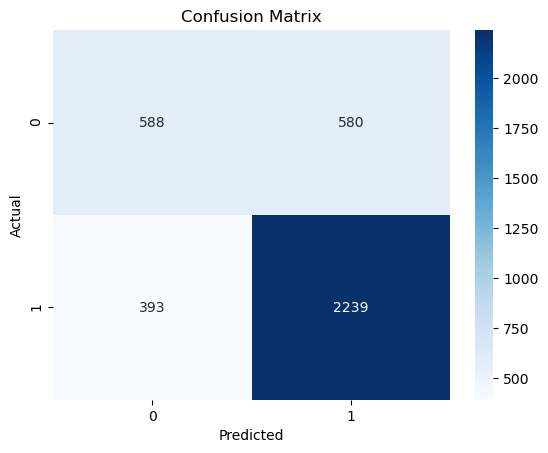

In [137]:
cm_stack = confusion_matrix(y_test, y_pred_xgb2_stack)

sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Se concluye que no se mejoró el rendimiento de los modelos en la metrica deseada, asi que se decide continuar con el mismo

### Eleccion de modelo:

Se elige el modelo Stack usando todas las variables ya que se obtuvo el mismo rendimiento que el XGBoost pero al poseer la red como apoyo puede ayudarle a generalizar de mejor manera por experiencia

## Predicciones Base Prueba

Se realizan las predicciones en el dataset de prueba

In [165]:
test

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,llave,segmentoestructural,subsegmentoestructural,anhomes_ciclo
0,5,5,2.041241,2.5,5,5,0.833333,5,0,1.666667,...,0,0,1,0,0,10.041311,38395,PYME,Pyme Pequena,201707
1,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,2,0,0,7.506349,38396,PYME,Pyme Pequena,201706
2,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,2,0,0,7.506349,38398,PYME,Pyme Pequena,201706
3,5,5,2.886751,2.5,5,5,1.666667,5,0,1.666667,...,0,0,1,0,0,10.041311,38401,PYME,Pyme Pequena,201707
4,0,0,0.000000,0.0,0,0,0.000000,0,0,0.000000,...,0,0,1,0,0,10.041311,38402,PYME,Pyme Pequena,201707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15,15,5.879342,0.0,0,0,4.166667,0,0,5.000000,...,0,0,1,0,0,8.965414,40440,PYME,Pyme Pequena,201704
996,9,15,6.220932,4.5,0,0,4.500000,9,0,4.000000,...,0,0,3,0,0,13.772206,40442,PYME,Pyme Pequena,201707
997,3,15,5.899152,1.5,3,3,4.000000,3,0,1.000000,...,0,0,1,0,0,5.995293,40447,PYME,Pyme Pequena,201705
998,4,4,1.788854,2.0,4,4,0.800000,4,0,1.333333,...,0,0,6,0,0,12.083929,40451,PYME,Pyme Pequena,201611


In [174]:
def predecir(data):
    data = data.drop(["segmentoestructural","subsegmentoestructural"], axis=1)
    llave = pd.DataFrame(data["llave"])
    X = data.drop(["llave"], axis=1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    base_learner = joblib.load("base_learner.pkl")
    meta_learner = joblib.load("meta_learner.pkl")
    
    y_probabilidad = base_learner.predict(X_scaled)
    y_pred = (y_probabilidad > 0.5).astype(int)
    
    X_stack = np.column_stack([X_scaled, y_pred])
    
    y_final = meta_learner.predict_proba(X_stack)[:,1]
    
    llave["probabilidad"] = y_final
    
    return llave

In [175]:
prueba = predecir(test)

In [176]:
prueba

,llave,probabilidad
0,38395,0.994043
1,38396,0.988767
2,38398,0.988767
3,38401,0.994043
4,38402,0.992996
...,...,...
995,40440,0.988396
996,40442,0.993109
997,40447,0.598500
998,40451,0.898310


In [177]:
prueba.to_csv("Base_prueba_evaluado.csv")